In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd
import pyproj
import pygmt
import eqs_magnetics as eqs
import itertools
import synthetics
import warnings

In [2]:
icegrav = pd.read_table(
    '../data/ICEGRAV_Mag_2013_v2.XYZ',
    delim_whitespace=True,
    na_values="*",
    dtype={'Line_Number':str}
)
icegrav.dropna(subset=('Lon', 'Lat'), inplace=True)

In [3]:
projection = pyproj.Proj(projparams='+proj=ups +south', preserve_units=False)
x,y = projection(icegrav.Lon, icegrav.Lat)
coordinates = [x, y]
coordinates.append(np.full_like(coordinates[0], icegrav.Height_WGS1984))

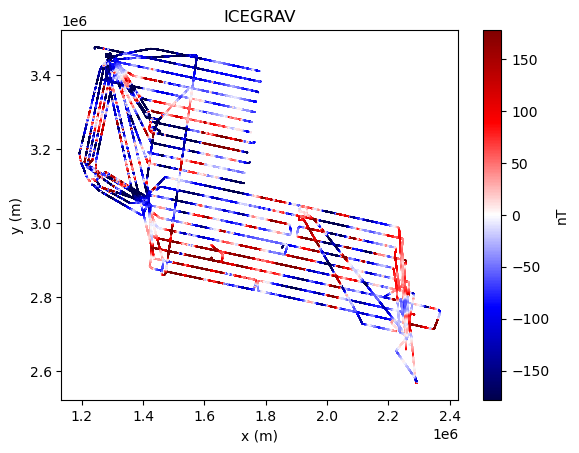

In [4]:
plt.figure()
scale = np.nanpercentile(icegrav.MagL, 95)
plt.scatter(*coordinates[:2], c=icegrav.MagL, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="nT")
plt.title("ICEGRAV")
plt.show()

In [5]:
field_direction = eqs.angles_to_vector(-65, -25, 1)

In [242]:
dipole_moments = []
source_coordinates = []
source_coordinates.append([[1.45e6], [3.5e6], [-3e3]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 1e14))

source_coordinates.append([[1.3e6], [3.46e6], [-3e3]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 1e14))

source_coordinates.append([[1.38e6], [3.39e6], [-100]])
dipole_moments.append(eqs.angles_to_vector(60, 60, 1.5e13))

source_coordinates.append([[1.52e6], [3.39e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-70, 60, 5e13))
source_coordinates.append([[1.54e6], [3.39e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-70, 60, 5e13))
source_coordinates.append([[1.56e6], [3.39e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-70, 60, 5e13))
source_coordinates.append([[1.58e6], [3.39e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-70, 60, 5e13))
source_coordinates.append([[1.6e6], [3.39e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-70, 60, 5e13))

source_coordinates.append(vd.profile_coordinates((1.32e6,3.25e6),(1.42e6,3.32e6), size=8, extra_coords=-200)[0])
dipole_moments.append(eqs.angles_to_vector(-50, 70, np.full(8, 5e12)))

source_coordinates.append([[1.65e6], [3.22e6], [-100]])
dipole_moments.append(eqs.angles_to_vector(60, 60, 5e13))

source_coordinates.append(vd.profile_coordinates((1.2e6,3.25e6),(1.3e6,3.15e6), size=8, extra_coords=-500)[0])
dipole_moments.append(eqs.angles_to_vector(-50, 70, np.full(8, 1e13)))

source_coordinates.append([[1.5e6], [3.2e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 3e14))

source_coordinates.append([[1.6e6], [3.1e6], [-300]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 5e13))

source_coordinates.append(vd.profile_coordinates((1.74e6,3.15e6),(1.85e6,3.4e6), size=15, extra_coords=-500)[0])
dipole_moments.append(eqs.angles_to_vector(-50, 70, np.full(15, 1e13)))

source_coordinates.append([[1.7e6], [3.1e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 1e14))

source_coordinates.append([[1.39e6], [3.07e6], [-3e3]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 1e14))

source_coordinates.append([[1.52e6], [3.05e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 1e14))

source_coordinates.append(vd.profile_coordinates((1.7e6,3.05e6),(1.75e6,2.95e6), size=15, extra_coords=-200)[0])
dipole_moments.append(eqs.angles_to_vector(-50, 70, np.full(15, 1e12)))

source_coordinates.append([[1.85e6], [2.95e6], [400]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 1e14))

source_coordinates.append(vd.profile_coordinates((1.5e6,2.9e6),(1.65e6,2.95e6), size=20, extra_coords=-800)[0])
dipole_moments.append(eqs.angles_to_vector(60, 60, np.full(20, 5e12)))
source_coordinates.append(vd.profile_coordinates((1.6e6,2.9e6),(1.9e6,2.9e6), size=30, extra_coords=-800)[0])
dipole_moments.append(eqs.angles_to_vector(60, 60, np.full(30, 5e12)))

source_coordinates.append(vd.profile_coordinates((1.9e6,2.75e6),(2.05e6,3.05e6), size=30, extra_coords=-2e3)[0])
dipole_moments.append(eqs.angles_to_vector(-45, 70, np.full(30, 2e12)))
source_coordinates.append([[1.9e6], [2.82e6], [-2e3]])
dipole_moments.append(eqs.angles_to_vector(-45, 70, 8e13))
source_coordinates.append([[1.75e6], [2.8e6], [-2e3]])
dipole_moments.append(eqs.angles_to_vector(-45, 70, 8e13))
source_coordinates.append([[1.78e6], [2.8e6], [-2e3]])
dipole_moments.append(eqs.angles_to_vector(-45, 70, 8e13))

source_coordinates.append(vd.profile_coordinates((2.02e6,2.75e6),(2.1e6,3.95e6), size=30, extra_coords=-2e3)[0])
dipole_moments.append(eqs.angles_to_vector(70, 70, np.full(30, 8e12)))

source_coordinates.append(vd.profile_coordinates((2.1e6,2.75e6),(2.2e6,2.9e6), size=20, extra_coords=-2e3)[0])
dipole_moments.append(eqs.angles_to_vector(-50, 70, np.full(20, 5e12)))
source_coordinates.append(vd.profile_coordinates((2.2e6,2.6e6),(2.18e6,2.9e6), size=20, extra_coords=-2e3)[0])
dipole_moments.append(eqs.angles_to_vector(-50, 70, np.full(20, 5e12)))
source_coordinates.append([[2.15e6], [2.8e6], [-2e3]])
dipole_moments.append(eqs.angles_to_vector(-50, 60, 5e13))
source_coordinates.append([[2.15e6], [2.74e6], [-2e3]])
dipole_moments.append(eqs.angles_to_vector(-50, 60, 8e13))

source_coordinates.append(vd.profile_coordinates((2.21e6,3.0e6),(2.25e6,2.8e6), size=20, extra_coords=-5e3)[0])
dipole_moments.append(eqs.angles_to_vector(70, 70, np.full(20, 5e12)))

source_coordinates.append([[2.22e6], [2.6e6], [-1e3]])
dipole_moments.append(eqs.angles_to_vector(-80, 60, 1e14))

# regional
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([1.2e6,2.5e6,2.5e6,3.25e6,], shape=(20,20), extra_coords=-50e3)])
dipole_moments.append(eqs.angles_to_vector(-70, -30, np.full(400, 1e14)))

source_coordinates = np.concatenate(source_coordinates, axis=1)
dipole_moments = np.concatenate(dipole_moments, axis=1)

In [243]:
b_field = eqs.dipole_magnetic(coordinates, source_coordinates, dipole_moments)
tfa = eqs.total_field_anomaly(b_field, field_direction)
bnorm = eqs.magnetic_field_norm(b_field)

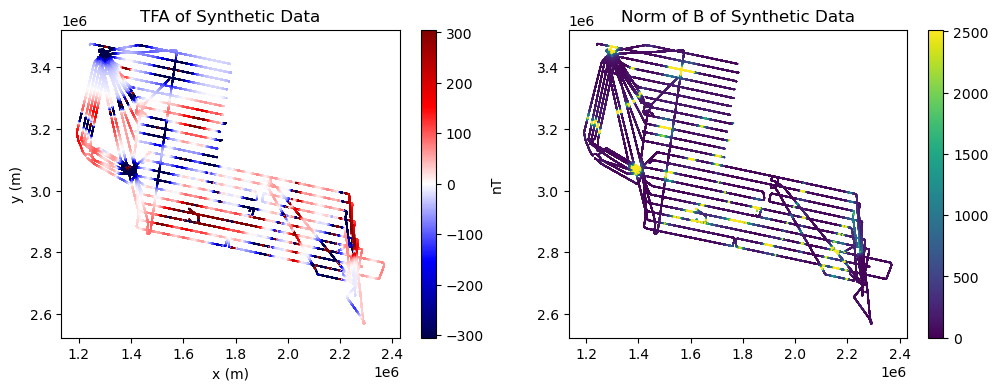

In [244]:
plt.figure(figsize=(12,4))
scale = np.nanpercentile(tfa, 95)
# scale = vd.maxabs(tfa)
plt.subplot(1,2,1)
plt.scatter(*coordinates[:2], c=tfa, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.title("TFA of Synthetic Data")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="nT")
scale_bnorm = np.nanpercentile(bnorm, 95)
# scale_bnorm = vd.maxabs(bnorm)
plt.subplot(1,2,2)
plt.scatter(*coordinates[:2], c=bnorm, cmap="viridis",s=0.01, vmin=0, vmax=scale_bnorm)
plt.title("Norm of B of Synthetic Data")
plt.colorbar()
plt.show()